# problem 3 a

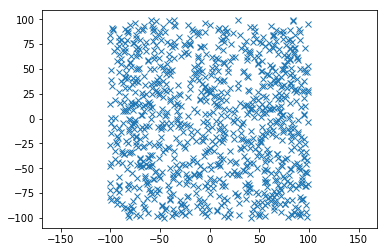

In [74]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from matplotlib import colors
np.random.seed(3)
C1_train=np.random.randint(-100, 100, size=[1000,2])

plt.plot(C1_train[:,0], C1_train[:,1],  'x')
plt.axis('equal')
plt.show()

In [75]:
y_train=[]
for i in range(len(C1_train)):
    x=C1_train[i][0]
    y=C1_train[i][1]
    if y<x**2:
        y_train.append(0)
    else:
        y_train.append(1)


# problem 3 b

In [76]:
score=np.zeros((10,10))
alphas=np.logspace(-6,1,10)
layers=np.arange(1,11)
i=0
for a in alphas:
    for b in layers:
        clf = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(b), random_state=1)
        score_one = model_selection.cross_val_score(clf, C1_train, y_train, cv=5, scoring='accuracy')
        score[i][b-1] =score_one.mean()
    i=i+1    
re=np.where(score==np.max(score))
i=re[0][0]
a=alphas[i]
index2=re[1][0]+1
b=layers[index2]
print('the best alpha is:',a)
print('the best layer is:',b)

clf = MLPClassifier(solver='lbfgs', alpha=a, hidden_layer_sizes=(b), random_state=1)

clf.fit(C1_train, y_train) 

the best alpha is: 0.00774263682681
the best layer is: 8


MLPClassifier(activation='relu', alpha=0.0077426368268112694,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=8, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [105]:
score=np.zeros((10,10))
layer2=np.arange(1,11)
layer3=np.arange(1,11)
for c in layer2:
    for d in layer3:
        clf = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(b,c,d), random_state=1)
        score_one = model_selection.cross_val_score(clf, C1_train, y_train, cv=5, scoring='accuracy')
        score[c-1][d-1]=score_one.mean()
re=np.where(score==np.max(score))
index2=re[0][0]+1
c=layer2[index2]
index3=re[1][0]+1
d=layer3[index3]
print('the best layer2 is:',c)
print('the best layer3 is:',d)  


clf = MLPClassifier(solver='lbfgs', alpha=a, hidden_layer_sizes=(b,c,d), random_state=1)

clf.fit(C1_train, y_train) 

the best layer2 is: 5
the best layer3 is: 6


MLPClassifier(activation='relu', alpha=0.0077426368268112694,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(8, 5, 6),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [107]:
print(np.max(score))

0.998


In [102]:
np.random.seed(22)
C1_test=np.random.randint(-100, 100, size=[2000,2])
y_test=[]
for i in range(len(C1_test)):
    x=C1_test[i][0]
    y=C1_test[i][1]
    if y<x**2:
        y_test.append(0)
    else:
        y_test.append(1)
y_test_pred=clf.predict(C1_test)

p=clf.score(C1_test,y_test)
print('accuracy score:',p)

accuracy score: 0.9985


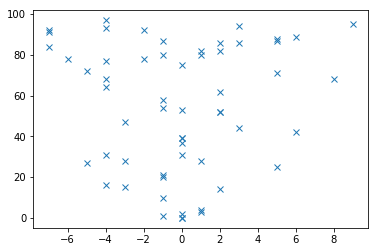

In [103]:
### 
C1=[[0,0]]
for i in range(len(C1_test)):
    if y_test_pred[i]==1:
        x=C1_test[i][0]
        y=C1_test[i][1]
        C1.append([x,y])
C1=np.array(C1)
plt.plot(C1[:,0], C1[:,1],  'x')
plt.show()